# Problem Satatement 
Given a specific activation function
g(x) = k0 + k1x (1)
and categorical cross-entropy loss, design a Neural Network on
Banknote, MNIST or IRIS data where the activation function
parameters k0, k1 are learned from the data you choose from
one of the above-mentioned data sets. Your solution must
include the learnable parameter values i.e. final k0, k1 values
at the end of training, a plot depicting changes in k0, k1 at
each epoch, training vs test loss, train vs. test accuracy and a
Loss function plot.


In [2]:
#---------------------------------------------------------------
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#---------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

#---------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [3]:
bn = pd.read_csv('datasets/BankNote_Authentication.csv')
bn.columns =['variance', 'skewness', 'curtosis', 'entropy', 'target']

In [4]:
train , test = train_test_split(bn , test_size=0.2)

In [5]:
train_x = train.drop(['target'], axis=1)
train_y = train.target
test_x = test.drop(['target'] , axis=1)
test_y = test.target
train_y = to_categorical(train_y)

In [6]:
class bank_note_model:


    
    def __init__(self , activation_fun , train_x , train_y , test_x , test_y):
        self.activation_fun = activation_fun
        self.train_x = train_x
        self.train_y =train_y
        self.test_x = test_x
        self.test_y = test_y
        self.model = Sequential()
        self.weights_dict = {}
        self.history = []
        self.fpr =0 
        self.trp =0 
        self.accuracy =0
        self.f1_score = 0
        self.conf_matrix=[]
        self.loss = 0
        self.pred =[]
        self.f1_score=0
    
    def execute_model(self):
        self.model = Sequential()
        self.model.add(Dense(4, activation=self.activation_fun ,name ='L0',kernel_initializer='he_uniform' ))
        self.model.add(Dense(4,activation=self.activation_fun , name='L1' , kernel_initializer='he_uniform'))
        self.model.add(Dense(2 , activation='softmax', name='O'))
        self.model.compile(optimizer='Adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

        #weight callback -----------------------------------------
        weight_callback = keras.callbacks.LambdaCallback \
        ( on_epoch_end=lambda epoch, logs: self.weights_dict.update({epoch:self.model.get_weights()}))
        
        #history---------------------------------------------------
        self.history =self.model.fit(self.train_x , self.train_y , validation_split=0.2 , epochs=50 , callbacks=[weight_callback])        
        
        #prediction -----------------------------------------------
        self.pred = self.model.predict_classes(self.test_x)
        
        #Performance evaluaion matrices
        self.conf_matrix = confusion_matrix(self.pred , self.test_y)
        self.accuracy = np.sum(np.diag(self.conf_matrix))/np.sum(self.conf_matrix)
        self.fpr = (self.conf_matrix[1,0]/np.sum(self.conf_matrix[1,0]+self.conf_matrix[0,0]))*100
        self.tpr = (self.conf_matrix[1,1]/np.sum(self.conf_matrix[1,1] + self.conf_matrix[0,1]))*100
        self.f1_score = f1_score(self.test_y , self.pred)
        

In [7]:
bank_note_elu = bank_note_model('elu',train_x , train_y , test_x , test_y)
bank_note_relu = bank_note_model('relu',train_x , train_y , test_x , test_y)
bank_note_sigmoid = bank_note_model('sigmoid',train_x , train_y , test_x , test_y)
bank_note_tanh = bank_note_model('tanh',train_x , train_y , test_x , test_y)

In [8]:
models = [bank_note_elu , bank_note_relu, bank_note_sigmoid , bank_note_tanh]

In [9]:
for i in models:
    i.execute_model()

Epoch 1/50
28/28 [==============================] - 3s 68ms/step - loss: 3.0865 - accuracy: 0.5302 - val_loss: 2.1372 - val_accuracy: 0.5636
Epoch 2/50
28/28 [==============================] - 0s 6ms/step - loss: 1.9955 - accuracy: 0.5442 - val_loss: 1.1794 - val_accuracy: 0.5682
Epoch 3/50
28/28 [==============================] - 0s 7ms/step - loss: 1.0715 - accuracy: 0.6344 - val_loss: 0.6704 - val_accuracy: 0.6727
Epoch 4/50
28/28 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.6741 - val_loss: 0.5949 - val_accuracy: 0.6864
Epoch 5/50
28/28 [==============================] - 0s 7ms/step - loss: 0.6074 - accuracy: 0.6769 - val_loss: 0.5355 - val_accuracy: 0.7091
Epoch 6/50
28/28 [==============================] - 0s 7ms/step - loss: 0.5340 - accuracy: 0.7428 - val_loss: 0.4900 - val_accuracy: 0.7409
Epoch 7/50
28/28 [==============================] - 0s 7ms/step - loss: 0.4773 - accuracy: 0.7701 - val_loss: 0.4550 - val_accuracy: 0.7773
Epoch 8/50
28/28 [=

Epoch 17/50
28/28 [==============================] - 0s 7ms/step - loss: 0.4891 - accuracy: 0.9646 - val_loss: 0.4723 - val_accuracy: 0.9727
Epoch 18/50
28/28 [==============================] - 0s 6ms/step - loss: 0.4715 - accuracy: 0.9537 - val_loss: 0.4509 - val_accuracy: 0.9818
Epoch 19/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4510 - accuracy: 0.9679 - val_loss: 0.4295 - val_accuracy: 0.9864
Epoch 20/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4317 - accuracy: 0.9704 - val_loss: 0.4082 - val_accuracy: 0.9864
Epoch 21/50
28/28 [==============================] - 0s 6ms/step - loss: 0.4022 - accuracy: 0.9836 - val_loss: 0.3871 - val_accuracy: 0.9864
Epoch 22/50
28/28 [==============================] - 0s 6ms/step - loss: 0.3888 - accuracy: 0.9823 - val_loss: 0.3655 - val_accuracy: 0.9955
Epoch 23/50
28/28 [==============================] - 0s 7ms/step - loss: 0.3663 - accuracy: 0.9864 - val_loss: 0.3449 - val_accuracy: 0.9955
Epoch 24/50
2

### Tpr Comparison 

In [10]:
tpr_vals = {}
for i in models:
    tpr_vals.update({i.activation_fun:i.tpr})
    
    
fpr_vals = {}
for i in models:
    fpr_vals.update({i.activation_fun:i.fpr})
    
    
    
    
accurracy_vals ={}
for i in models:
    accurracy_vals.update({i.activation_fun:i.accuracy})
    
f1_score_vals={}
for i in models:
    f1_score_vals.update({i.activation_fun:i.f1_score})

### Performance Parameters of Each model with different activation functions

# Accuracy 

In [11]:
accurracy_vals

{'elu': 0.9309090909090909,
 'relu': 1.0,
 'sigmoid': 0.9854545454545455,
 'tanh': 1.0}

# fpr

In [12]:
fpr_vals

{'elu': 6.7114093959731544,
 'relu': 0.0,
 'sigmoid': 2.684563758389262,
 'tanh': 0.0}

# Tpr

In [13]:
accurracy_vals

{'elu': 0.9309090909090909,
 'relu': 1.0,
 'sigmoid': 0.9854545454545455,
 'tanh': 1.0}

# F1_Score

In [14]:
f1_score_vals

{'elu': 0.924901185770751,
 'relu': 1.0,
 'sigmoid': 0.9843749999999999,
 'tanh': 1.0}

### Getting avarage weight and bias values 

In [15]:
weight_vals_layer1 = {}
for i in models:
    k11 =[]
    for j in range(0,50):
        k11.append(i.weights_dict.get(j)[0].mean())
    weight_vals_layer1.update({i.activation_fun:k11})
    
bias_vals_layer1 = {}
for i in models:
    k10 =[]
    for j in range(0,50):
        k10.append(i.weights_dict.get(j)[1].mean())
    bias_vals_layer1.update({i.activation_fun:k10})
    
weight_vals_layer2 = {}
for i in models:
    k21 =[]
    for j in range(0,50):
        k21.append(i.weights_dict.get(j)[2].mean())
    weight_vals_layer2.update({i.activation_fun:k21})
    
    
bias_vals_layer2 = {}
for i in models:
    k20 =[]
    for j in range(0,50):
        k20.append(i.weights_dict.get(j)[3].mean())
    bias_vals_layer2.update({i.activation_fun:k20})

      
    
weight_vals_layer3 = {}
for i in models:
    k31 =[]
    for j in range(0,50):
        k31.append(i.weights_dict.get(j)[4].mean())
    weight_vals_layer3.update({i.activation_fun:k31})

    
bias_vals_layer3 = {}
for i in models:
    k30 =[]
    for j in range(0,50):
        k30.append(i.weights_dict.get(j)[5].mean())
    bias_vals_layer3.update({i.activation_fun:k30})

### Change in average weight of first layer Input Layer

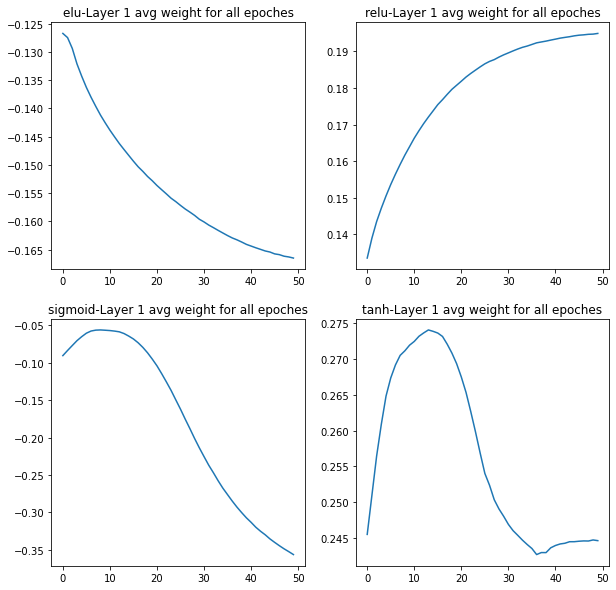

In [16]:
plt.figure(figsize=(10,10))
for i in range(0,len(weight_vals_layer1)):
    plt.subplot(2,2,i+1)
    plt.plot( list(range(0,50)), weight_vals_layer1.get(list(weight_vals_layer1.keys())[i]))
    plt.title(list(weight_vals_layer1.keys())[i]+"-Layer 1 avg weight for all epoches")

### change in average weight of second layer or Hidden Layer

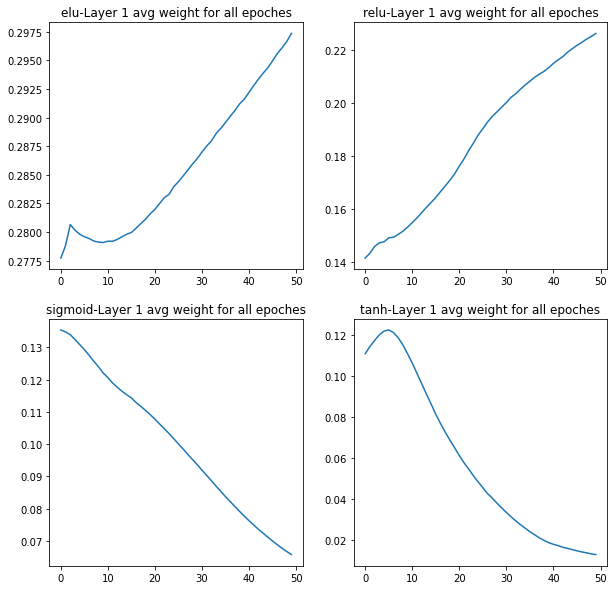

In [17]:

plt.figure(figsize=(10,10))
for i in range(0,len(weight_vals_layer2)):
    plt.subplot(2,2,i+1)
    plt.plot( list(range(0,50)) ,weight_vals_layer2.get(list(weight_vals_layer2.keys())[i]) )
    plt.title(list(weight_vals_layer2.keys())[i]+"-Layer 1 avg weight for all epoches")


### change in average weight of third  layer or O/P layer 

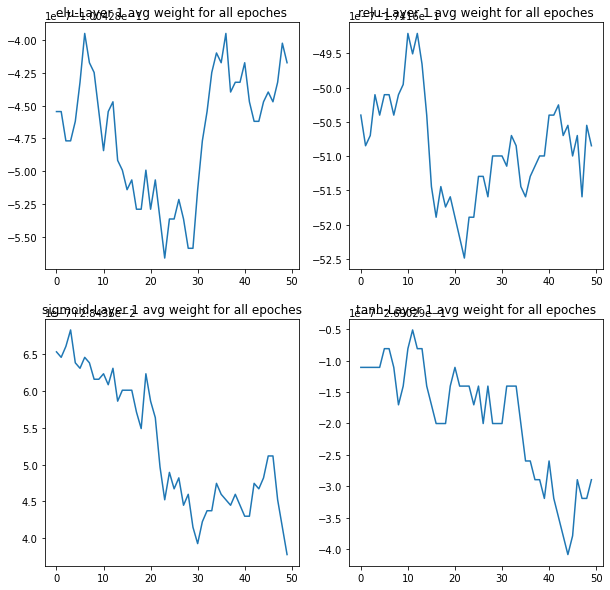

In [18]:
plt.figure(figsize=(10,10))
for i in range(0,len(weight_vals_layer3)):
    plt.subplot(2,2,i+1)
    plt.plot(list(range(0,50)), weight_vals_layer3.get(list(weight_vals_layer3.keys())[i]) )
    plt.title(list(weight_vals_layer3.keys())[i]+"-Layer 1 avg weight for all epoches")

### change in average bias of first  layer or I/P layer 

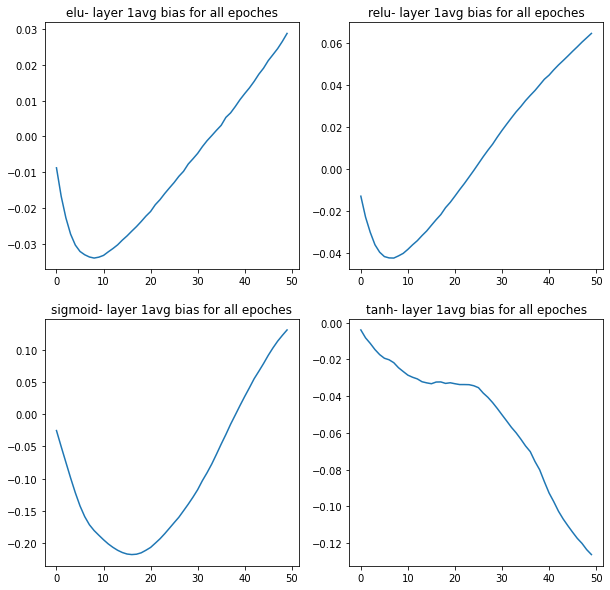

In [19]:
  
plt.figure(figsize=(10,10))
for i in range(0,len(bias_vals_layer1)):
    plt.subplot(2,2,i+1)
    plt.plot( list(range(0,50)) , bias_vals_layer1.get(list(bias_vals_layer1.keys())[i]))
    plt.title(list(bias_vals_layer2.keys())[i]+"- layer 1avg bias for all epoches")


### change in average bias of second  layer or Hidden layer 

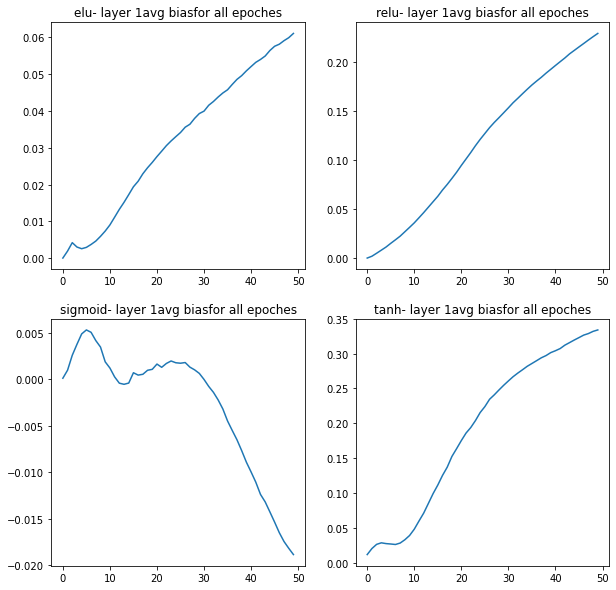

In [20]:
  
plt.figure(figsize=(10,10))
for i in range(0,len(bias_vals_layer2)):
    plt.subplot(2,2,i+1)
    plt.plot( list(range(0,50)) , bias_vals_layer2.get(list(bias_vals_layer2.keys())[i]))
    plt.title(list(bias_vals_layer2.keys())[i]+"- layer 1avg biasfor all epoches")

### change in average bias of third  layer or O/P layer 

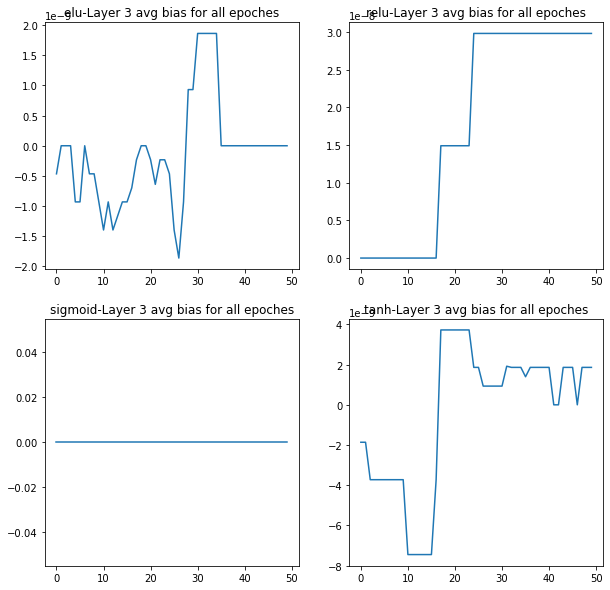

In [21]:

plt.figure(figsize=(10,10))
for i in range(0,len(bias_vals_layer3)):
    plt.subplot(2,2,i+1)
    plt.plot( list(range(0,50)) , bias_vals_layer3.get(list(bias_vals_layer3.keys())[i]))
    plt.title(list(bias_vals_layer3.keys())[i]+"-Layer 3 avg bias for all epoches")

### Plotting validation loss and loss

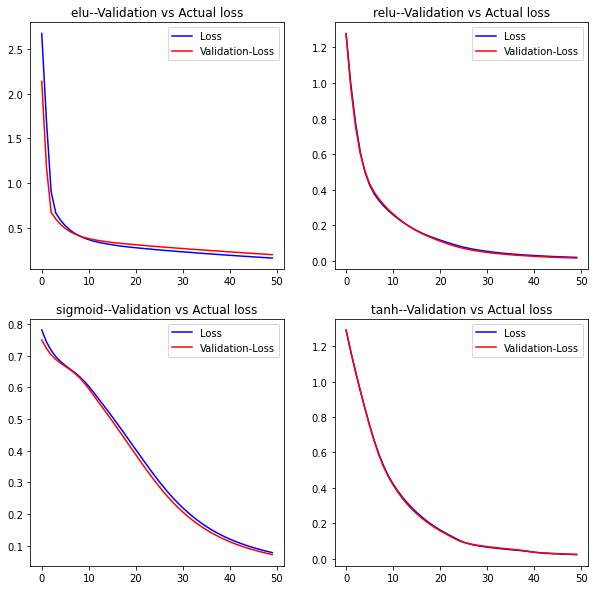

In [22]:
plt.figure(figsize= (10, 10))

for i in range(0 , len(models)):
    plt.subplot(2,2,i+1)
    plt.plot(models[i].history.history.get('loss'), color = "b"  , label = "Loss")
    plt.plot(models[i].history.history.get('val_loss') , color = "r"   , label ="Validation-Loss")
    plt.title(models[i].activation_fun +"--Validation vs Actual loss")
    plt.legend()